In [3]:
import pandas as pd


In [8]:
import os

In [11]:
# reading all files from Data_sales directory
files = [file for file in os.listdir('./Sales_Data')]

#use dataFrame constructor to create an empty dataFrame
all_months_data = pd.DataFrame()

for file in files:
    month_data = pd.read_csv('./Sales_Data/'+file)
    all_months_data = pd.concat([all_months_data, month_data], ignore_index=True, sort=False)
    


In [13]:
# export all data into csv file
all_months_data.to_csv('all_data',index=False)

In [47]:
# read data from the new file
df = pd.read_csv('all_data')
df.head()

Order ID                     Product Quantity Ordered Price Each  \
0   162009                      iPhone                1        700   
1   162009    Lightning Charging Cable                1      14.95   
2   162009            Wired Headphones                2      11.99   
3   162010  Bose SoundSport Headphones                1      99.99   
4   162011      34in Ultrawide Monitor                1     379.99   

       Order Date                      Purchase Address  
0  03/28/19 20:59       942 Church St, Austin, TX 73301  
1  03/28/19 20:59       942 Church St, Austin, TX 73301  
2  03/28/19 20:59       942 Church St, Austin, TX 73301  
3  03/17/19 05:39  261 10th St, San Francisco, CA 94016  
4  03/10/19 00:01  764 13th St, San Francisco, CA 94016

In [48]:
#rename columns names
df.columns = df.columns.str.replace(' ','_')

# Clean up the data

In [49]:
# display rows with row at least NAN values
df[df.isna().any(axis=1)]

# drop rows which have only nan values
df.dropna(how='all',inplace=True) 

In [50]:
# choose the rows who do not contains word 'Or' 
df = df[df.Order_Date.str[0:2] != 'Or']
df.head()

Order_ID                     Product Quantity_Ordered Price_Each  \
0   162009                      iPhone                1        700   
1   162009    Lightning Charging Cable                1      14.95   
2   162009            Wired Headphones                2      11.99   
3   162010  Bose SoundSport Headphones                1      99.99   
4   162011      34in Ultrawide Monitor                1     379.99   

       Order_Date                      Purchase_Address  
0  03/28/19 20:59       942 Church St, Austin, TX 73301  
1  03/28/19 20:59       942 Church St, Austin, TX 73301  
2  03/28/19 20:59       942 Church St, Austin, TX 73301  
3  03/17/19 05:39  261 10th St, San Francisco, CA 94016  
4  03/10/19 00:01  764 13th St, San Francisco, CA 94016

In [63]:
# convert Quanitity and Price colums to numbers
df['Quantity_Ordered'] = pd.to_numeric(df['Quantity_Ordered']) # convert into integer
df['Price_Each'] = pd.to_numeric(df['Price_Each']) # convert into float

# best month for sales and the money earned

Order_ID                     Product Quantity_Ordered Price_Each  \
186748   150403    Apple Airpods Headphones                1        150   
186749   150404             Vareebadd Phone                1        400   
186750   150405  Bose SoundSport Headphones                1      99.99   
186751   150406             ThinkPad Laptop                1     999.99   
186752   150407    Lightning Charging Cable                1      14.95   
...         ...                         ...              ...        ...   
186845   150497                20in Monitor                1     109.99   
186846   150498            27in FHD Monitor                1     149.99   
186847   150499             ThinkPad Laptop                1     999.99   
186848   150500      AAA Batteries (4-pack)                2       2.99   
186849   150501                Google Phone                1        600   

            Order_Date                         Purchase_Address  month_sales  
186748  01/30/19 09:48   201 Wilson St, San Francisco, CA 94016            1  
186749  01/15/19 22:46  596 Lincoln St, New York City, NY 10001            1  
186750  01/11/19 22:40       848 Hickory St, Portland, OR 97035            1  
186751  01/20/19 06:55  183 Johnson St, San Francisco, CA 94016            1  
186752  01/20/19 07:25    805 South St, San Francisco, CA 94016            1  
...                ...                                      ...          ...  
186845  01/26/19 19:09              95 8th St, Dallas, TX 75001            1  
186846  01/10/19 22:58      403 7th St, San Francisco, CA 94016            1  
186847  01/21/19 14:31          214 Main St, Portland, OR 97035            1  
186848  01/15/19 14:21        810 2nd St, Los Angeles, CA 90001            1  
186849  01/13/19 16:43           428 Cedar St, Boston, MA 02215            1  

[100 rows x 7 columns]

In [124]:
# add  a new column for month sales
df['month_sales'] = df['Order_Date'].str[0:2]
df['month_sales'] = df['month_sales'].astype('int32')

# add  a new column for sales : quantity by price
df['sales'] = df['Quantity_Ordered'] * df['Price_Each']

# add a new column for state
df['city'] = df['Purchase_Address'].str.split(",").str[1] + '('+df['Purchase_Address'].str.split(" ").str[-2]+')'


In [127]:
df.head()

Order_ID                     Product  Quantity_Ordered  Price_Each  \
0   162009                      iPhone                 1      700.00   
1   162009    Lightning Charging Cable                 1       14.95   
2   162009            Wired Headphones                 2       11.99   
3   162010  Bose SoundSport Headphones                 1       99.99   
4   162011      34in Ultrawide Monitor                 1      379.99   

       Order_Date                      Purchase_Address  month_sales   sales  \
0  03/28/19 20:59       942 Church St, Austin, TX 73301            3  700.00   
1  03/28/19 20:59       942 Church St, Austin, TX 73301            3   14.95   
2  03/28/19 20:59       942 Church St, Austin, TX 73301            3   23.98   
3  03/17/19 05:39  261 10th St, San Francisco, CA 94016            3   99.99   
4  03/10/19 00:01  764 13th St, San Francisco, CA 94016            3  379.99   

                 city  
0          Austin(TX)  
1          Austin(TX)  
2          Austin(TX)  
3   San Francisco(CA)  
4   San Francisco(CA)

# best month for sales and the money earned

In [76]:
sales_per_month = df.groupby('month_sales').sales.sum().reset_index() #add reset_index in order to return a dataFrame
sales_per_month

month_sales         sales
0             1  1.822257e+06
1             2  2.202022e+06
2             3  2.807100e+06
3             4  3.390670e+06
4             5  3.152607e+06
5             6  2.577802e+06
6             7  2.647776e+06
7             8  2.244468e+06
8             9  2.097560e+06
9            10  3.736727e+06
10           11  3.199603e+06
11           12  4.613443e+06

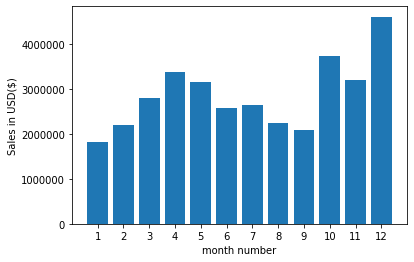

In [80]:
import matplotlib.pyplot as plt

months = range(1,13)
plt.bar(months,sales_per_month['sales'])
plt.xticks(months)
plt.xlabel('month number')
plt.ylabel('Sales in USD($)')
plt.show()

# Which city had the highest number of sales ?

In [132]:
sales_per_city = df.groupby(['city']).sales.sum().reset_index()
cities = [city for city, df in df.groupby('city')] #get cities in the same order of groupby result
sales_per_city

city         sales
0         Atlanta(GA)  2.795499e+06
1          Austin(TX)  1.819582e+06
2          Boston(MA)  3.661642e+06
3          Dallas(TX)  2.767975e+06
4     Los Angeles(CA)  5.452571e+06
5   New York City(NY)  4.664317e+06
6        Portland(ME)  4.497583e+05
7        Portland(OR)  1.870732e+06
8   San Francisco(CA)  8.262204e+06
9         Seattle(WA)  2.747755e+06

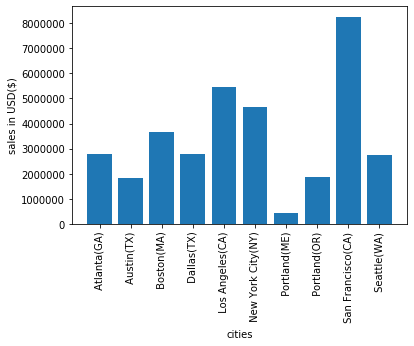

In [134]:
plt.bar(cities,sales_per_city['sales'])
plt.xticks(cities,rotation='vertical')
plt.xlabel('cities')
plt.ylabel('sales in USD($)')
plt.show()

# what time should we display the advertisment to maximize the likelihood of a product to be bought

In [141]:
# convert date column to datetime format
df.Order_Date = pd.to_datetime(df.Order_Date)
# add Hour column
df['Hour'] = df.Order_Date.dt.hour
df['Minute'] = df.Order_Date.dt.minute

In [142]:
df.head()

Order_ID                     Product  Quantity_Ordered  Price_Each  \
0   162009                      iPhone                 1      700.00   
1   162009    Lightning Charging Cable                 1       14.95   
2   162009            Wired Headphones                 2       11.99   
3   162010  Bose SoundSport Headphones                 1       99.99   
4   162011      34in Ultrawide Monitor                 1      379.99   

           Order_Date                      Purchase_Address  month_sales  \
0 2019-03-28 20:59:00       942 Church St, Austin, TX 73301            3   
1 2019-03-28 20:59:00       942 Church St, Austin, TX 73301            3   
2 2019-03-28 20:59:00       942 Church St, Austin, TX 73301            3   
3 2019-03-17 05:39:00  261 10th St, San Francisco, CA 94016            3   
4 2019-03-10 00:01:00  764 13th St, San Francisco, CA 94016            3   

    sales                city  Hour  Minute  
0  700.00          Austin(TX)    20      59  
1   14.95          Austin(TX)    20      59  
2   23.98          Austin(TX)    20      59  
3   99.99   San Francisco(CA)     5      39  
4  379.99   San Francisco(CA)     0       1

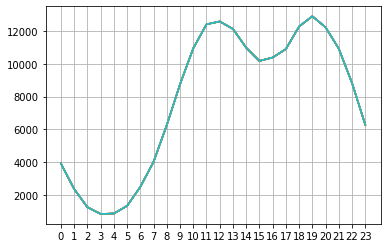

In [156]:
df.groupby(['Hour']).Order_ID.count().reset_index()
hours = [hour for hour, df in df.groupby('Hour')]
plt.xticks(hours)
plt.grid()
plt.plot(hours, df.groupby('Hour').count())
plt.show()
#on remarque que l'on peut faire de la publicite aux environs de 12h et 19h

# WHAT PRODUCTS ARE MOST OFTEN SOLD TOGETHER

In [157]:
df.head()

Order_ID                     Product  Quantity_Ordered  Price_Each  \
0   162009                      iPhone                 1      700.00   
1   162009    Lightning Charging Cable                 1       14.95   
2   162009            Wired Headphones                 2       11.99   
3   162010  Bose SoundSport Headphones                 1       99.99   
4   162011      34in Ultrawide Monitor                 1      379.99   

           Order_Date                      Purchase_Address  month_sales  \
0 2019-03-28 20:59:00       942 Church St, Austin, TX 73301            3   
1 2019-03-28 20:59:00       942 Church St, Austin, TX 73301            3   
2 2019-03-28 20:59:00       942 Church St, Austin, TX 73301            3   
3 2019-03-17 05:39:00  261 10th St, San Francisco, CA 94016            3   
4 2019-03-10 00:01:00  764 13th St, San Francisco, CA 94016            3   

    sales                city  Hour  Minute  
0  700.00          Austin(TX)    20      59  
1   14.95          Austin(TX)    20      59  
2   23.98          Austin(TX)    20      59  
3   99.99   San Francisco(CA)     5      39  
4  379.99   San Francisco(CA)     0       1

In [158]:
df.Product.values

array(['iPhone', 'Lightning Charging Cable', 'Wired Headphones', ...,
       'ThinkPad Laptop', 'AAA Batteries (4-pack)', 'Google Phone'],
      dtype=object)

In [176]:
T = df[df.Order_ID.duplicated(keep=False)]

T['command'] = T.groupby('Order_ID').Product.transform(lambda x: '-'.join(x))
T = T[['Order_ID','command']].drop_duplicates()

from itertools import combinations
from collections import Count

/home/kallen/.local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [177]:
T.head()

Order_ID                                           command
0    162009  iPhone-Lightning Charging Cable-Wired Headphones
30   162037                   iPhone-Lightning Charging Cable
60   162066        AA Batteries (4-pack)-USB-C Charging Cable
66   162071              Vareebadd Phone-USB-C Charging Cable
78   162082                  Vareebadd Phone-Wired Headphones

In [193]:
def get_most_sold_together(count,list,num):
    for item in list:
        count.update(Counter(combinations(item,num)))
    
list_command = [] # all command as a list
for command in T.command:
    list_command.append(command.split('-'))
    
count = Counter()
get_most_sold_together(count,list_command,4)
#for command in list_command:
   # count.update(Counter(combinations(command,3)))

for key, value in count.most_common(10):
    print(key, value)

('Google Phone', 'USB', 'C Charging Cable', 'Wired Headphones') 87
('AAA Batteries (4', 'pack)', 'USB', 'C Charging Cable') 50
('AAA Batteries (4', 'pack)', 'AAA Batteries (4', 'pack)') 48
('AA Batteries (4', 'pack)', 'AAA Batteries (4', 'pack)') 48
('USB', 'C Charging Cable', 'USB', 'C Charging Cable') 48
('USB', 'C Charging Cable', 'AAA Batteries (4', 'pack)') 45
('AAA Batteries (4', 'pack)', 'AA Batteries (4', 'pack)') 39
('USB', 'C Charging Cable', 'AA Batteries (4', 'pack)') 38
('AA Batteries (4', 'pack)', 'USB', 'C Charging Cable') 37
('Google Phone', 'USB', 'C Charging Cable', 'Bose SoundSport Headphones') 35


# WHAT PRODUCT SOLD THE MOST AND WHY?

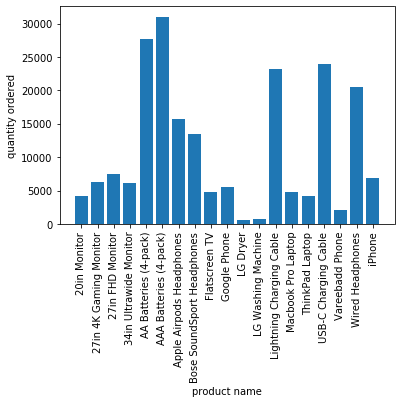

In [203]:
quantity_ordered = df.groupby('Product').Quantity_Ordered.sum()
products = [Product for Product, df in df.groupby('Product')]

plt.bar(products,quantity_ordered)
plt.xticks(products,rotation='vertical',size=10)
plt.xlabel('product name')
plt.ylabel('quantity ordered')
plt.show()

#AAA Batteries(4-pack) is the most sold product

In [204]:
df.head()

Order_ID                     Product  Quantity_Ordered  Price_Each  \
0   162009                      iPhone                 1      700.00   
1   162009    Lightning Charging Cable                 1       14.95   
2   162009            Wired Headphones                 2       11.99   
3   162010  Bose SoundSport Headphones                 1       99.99   
4   162011      34in Ultrawide Monitor                 1      379.99   

           Order_Date                      Purchase_Address  month_sales  \
0 2019-03-28 20:59:00       942 Church St, Austin, TX 73301            3   
1 2019-03-28 20:59:00       942 Church St, Austin, TX 73301            3   
2 2019-03-28 20:59:00       942 Church St, Austin, TX 73301            3   
3 2019-03-17 05:39:00  261 10th St, San Francisco, CA 94016            3   
4 2019-03-10 00:01:00  764 13th St, San Francisco, CA 94016            3   

    sales                city  Hour  Minute  
0  700.00          Austin(TX)    20      59  
1   14.95          Austin(TX)    20      59  
2   23.98          Austin(TX)    20      59  
3   99.99   San Francisco(CA)     5      39  
4  379.99   San Francisco(CA)     0       1

In [213]:
prices = df.groupby('Product').mean()['Price_Each']
prices

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price_Each, dtype: float64

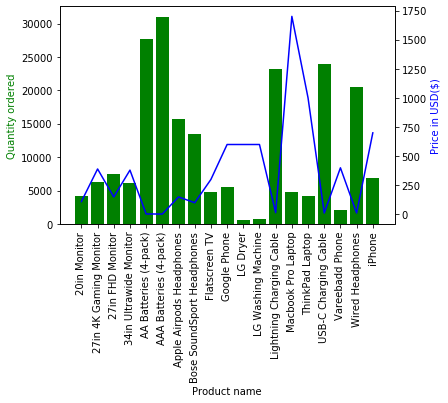

In [218]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered,color='g')
ax2.plot(products, prices, 'b-')

ax1.set_xlabel('Product name')
ax1.set_ylabel('Quantity ordered', color='g')
ax2.set_ylabel('Price in USD($)', color='b')
ax1.set_xticklabels(products,rotation='vertical',size=10)
plt.show()


# we can notice that cheap product are sold the most.

# JUST  TRAINING

In [223]:
import re
df.loc[df.Product.str.contains('Cable|Wired', flags=re.I,regex=True)]
#conditional changes
df.loc[df.Product.str.contains('Cable'),'Product'] = 'Item Changed'

In [224]:
df.head()

Order_ID                     Product  Quantity_Ordered  Price_Each  \
0   162009                      iPhone                 1      700.00   
1   162009                Item Changed                 1       14.95   
2   162009            Wired Headphones                 2       11.99   
3   162010  Bose SoundSport Headphones                 1       99.99   
4   162011      34in Ultrawide Monitor                 1      379.99   

           Order_Date                      Purchase_Address  month_sales  \
0 2019-03-28 20:59:00       942 Church St, Austin, TX 73301            3   
1 2019-03-28 20:59:00       942 Church St, Austin, TX 73301            3   
2 2019-03-28 20:59:00       942 Church St, Austin, TX 73301            3   
3 2019-03-17 05:39:00  261 10th St, San Francisco, CA 94016            3   
4 2019-03-10 00:01:00  764 13th St, San Francisco, CA 94016            3   

    sales                city  Hour  Minute  
0  700.00          Austin(TX)    20      59  
1   14.95          Austin(TX)    20      59  
2   23.98          Austin(TX)    20      59  
3   99.99   San Francisco(CA)     5      39  
4  379.99   San Francisco(CA)     0       1